<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zzero0/uci-breast-cancer-wisconsin-original")

print("Path to dataset files:", path)

100%|██████████| 5.71k/5.71k [00:00<00:00, 2.25MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zzero0/uci-breast-cancer-wisconsin-original/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
data = 'breast-cancer-wisconsin.data.txt'
df = pd.read_csv(data, header=None)
print("DataFrame loaded successfully:")
display(df.head())

DataFrame loaded successfully:


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(699, 11)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
col_names =['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df.drop('Id', axis=1 , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

In [ ]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')


In [ ]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [ ]:
df.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


In [ ]:
df.isna().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


In [ ]:
df['Bare_Nuclei'].value_counts()


,count
Bare_Nuclei,
1.0,402
10.0,132
2.0,30
5.0,30
3.0,28
8.0,21
4.0,19
9.0,9
7.0,8


In [ ]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [ ]:
df['Bare_Nuclei'].isna().sum()


In [ ]:
df['Class'].value_counts()/float(len(df))

,count
Class,
2,0.655222
4,0.344778


In [ ]:
print(round(df.describe(),2))


       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

Visualize Visualize Visualize !!!!

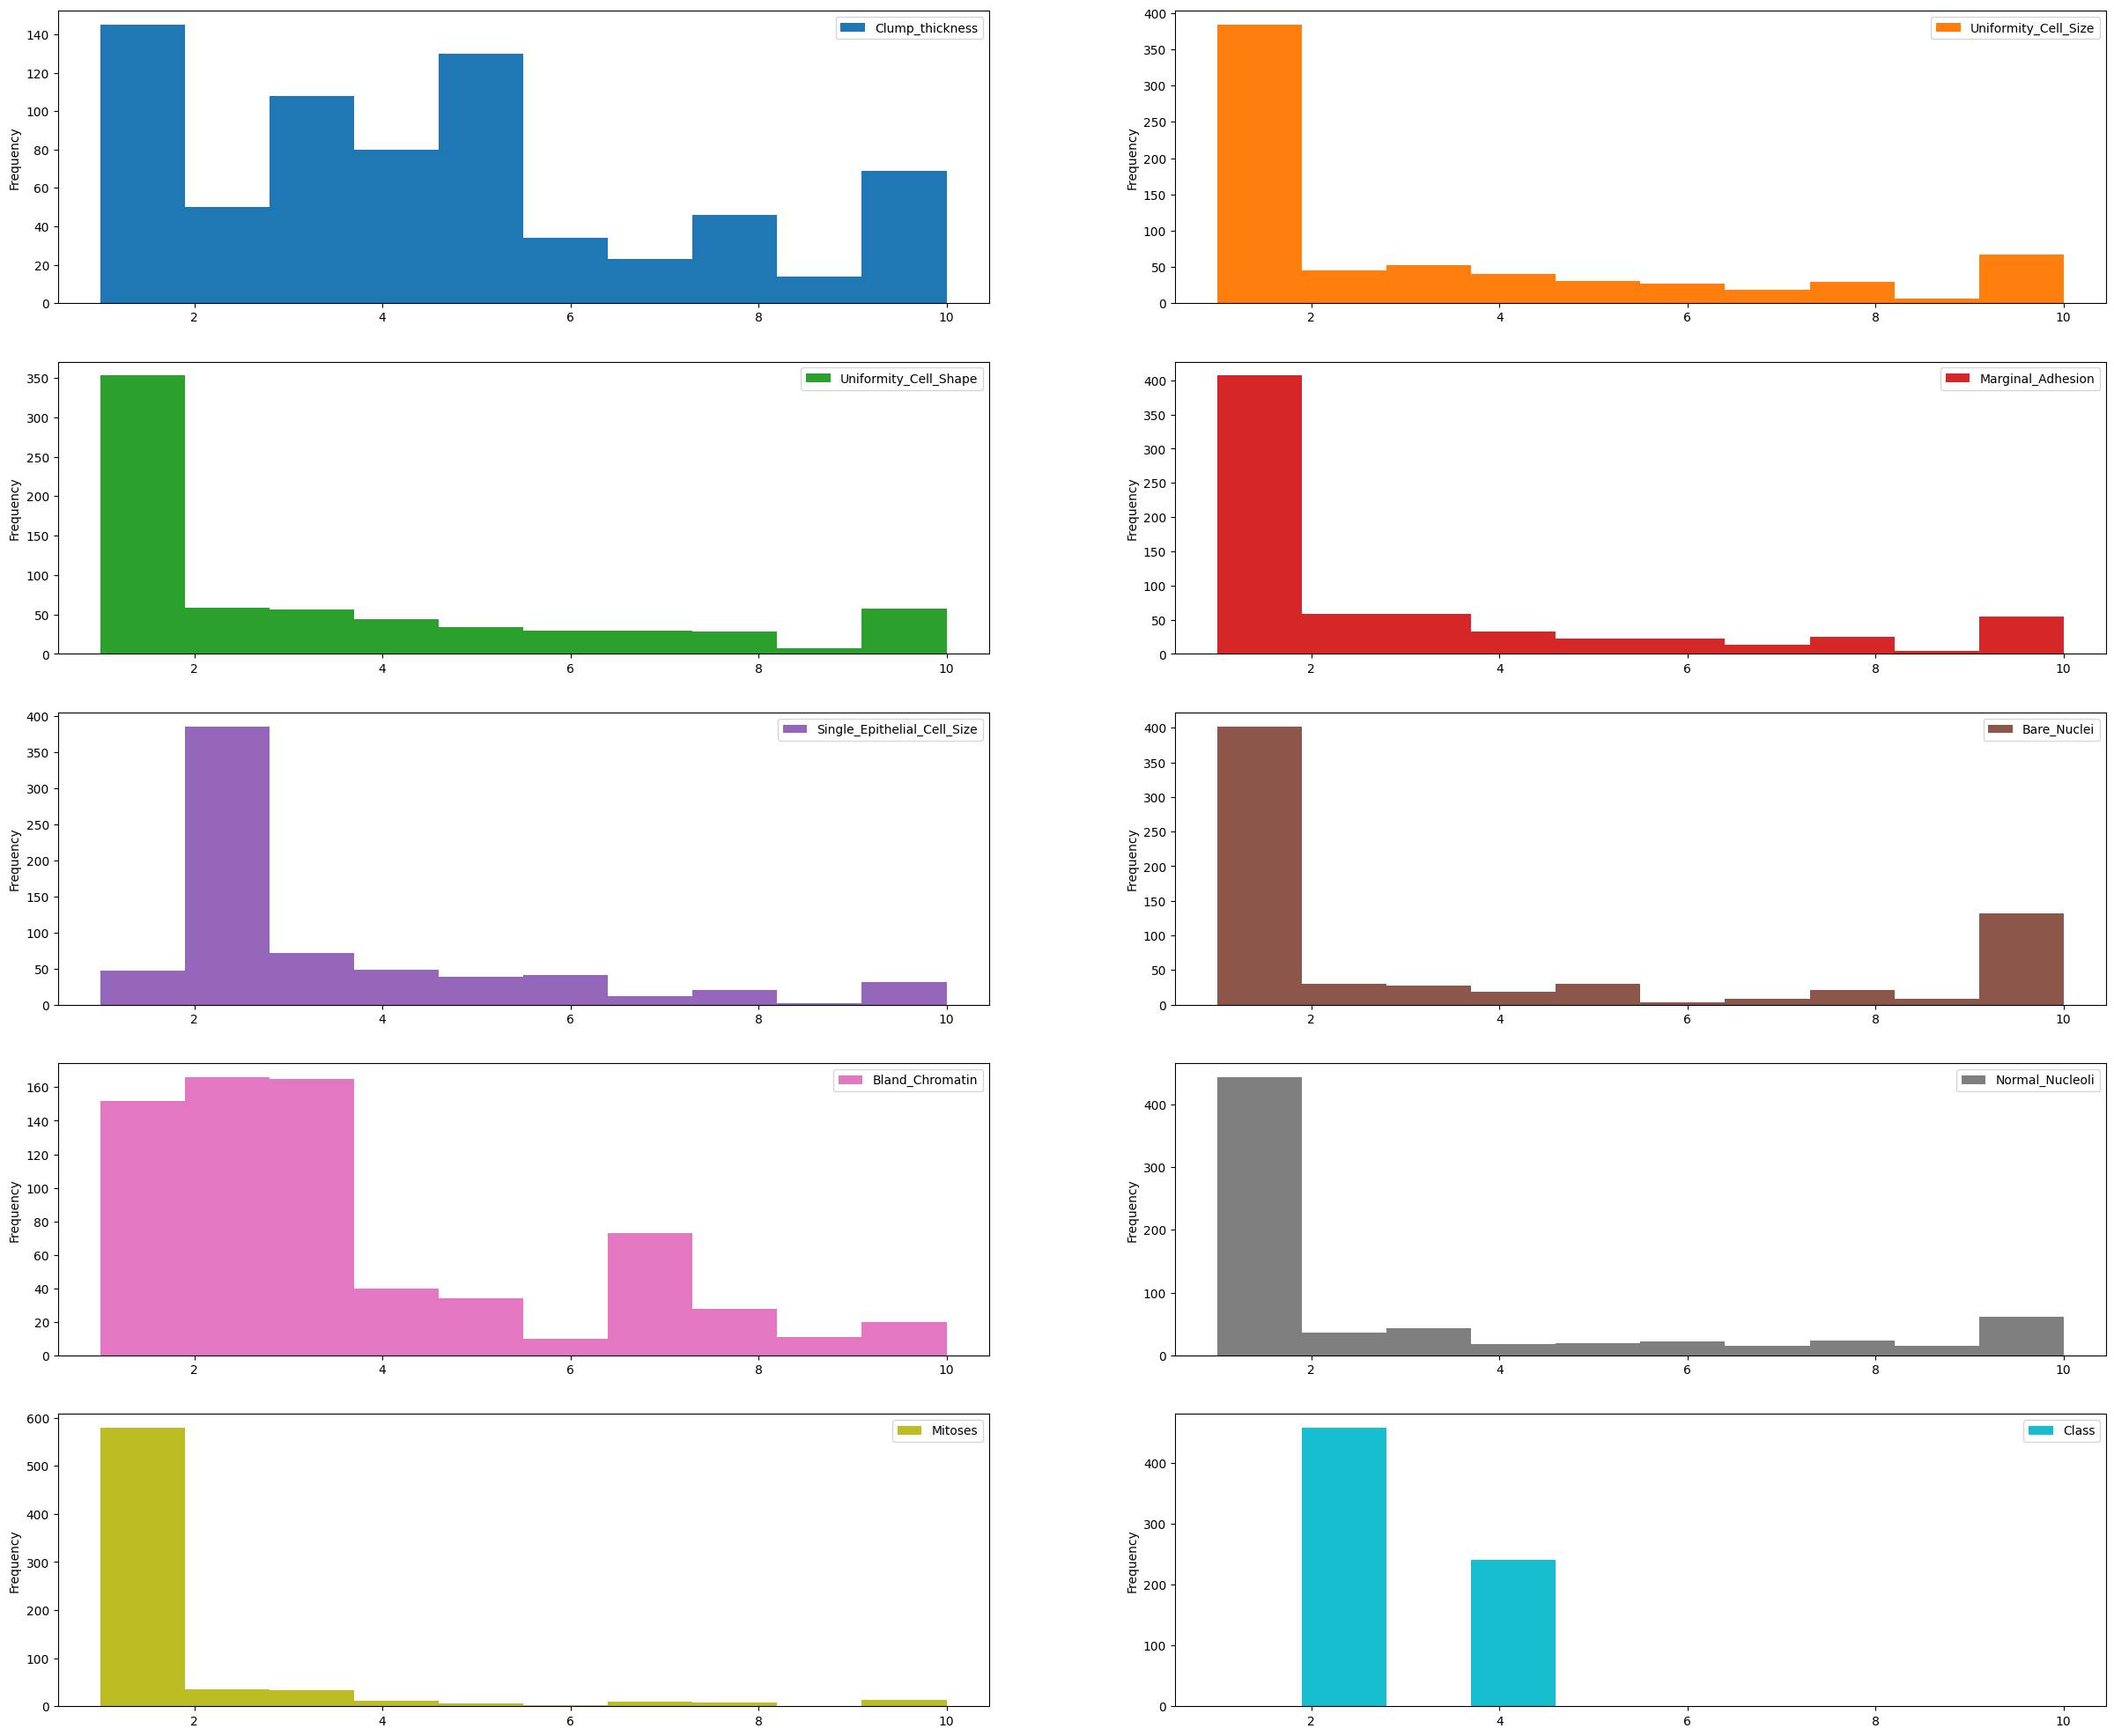

In [ ]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()


In [ ]:
#ompute the standard correlation coefficient (also called Pearson's r)
correlation = df.corr()


In [ ]:
correlation['Class'].sort_values(ascending=False)


,Class
Class,1.000000
Bare_Nuclei,0.822696
Uniformity_Cell_Shape,0.818934
Uniformity_Cell_Size,0.817904
Bland_Chromatin,0.756616
Clump_thickness,0.716001
Normal_Nucleoli,0.712244
Marginal_Adhesion,0.696800
Single_Epithelial_Cell_Size,0.682785
Mitoses,0.423170


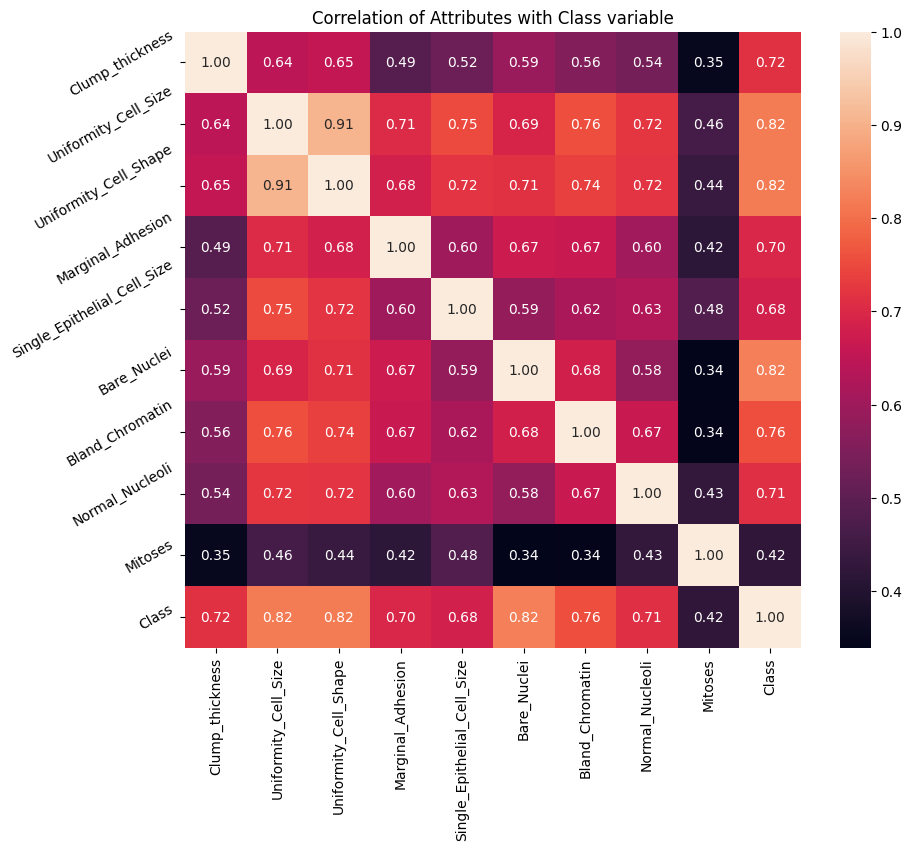

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
X = df.drop(['Class'] , axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=0)

In [ ]:
X_train.shape, X_test.shape


((559, 9), (140, 9))

feature eng

In [ ]:
X_train.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64


In [ ]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,13
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [ ]:
X_test.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,3
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [ ]:
# percentage of missing values
for col in X_train.columns:
    if X_train[col].isnull().mean() > 0:
        print(col,round( X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


 Imputation should be done over the training set, and then propagated to the test set

In [ ]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
      col_median = df1[col].median()
      df1[col].fillna(col_median, inplace=True)

In [ ]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [ ]:
X_test.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


feature scalling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train ,columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test , columns=[cols])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict (X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

In [ ]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [ ]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test ,y_pred)

0.9714285714285714

In [ ]:
y_pred_train=knn.predict(X_train)

# ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.9821109123434705

In [ ]:
y_test.value_counts()


,count
Class,
2,85
4,55


In [ ]:
null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))


Null accuracy score: 0.6071


Rebuild kNN Classification model using k=5¶


In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit (X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
print(accuracy_score(y_test, y_pred_5))


0.9714285714285714


 Confusion matrix

In [ ]:
from sklearn.metrics import  confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[83  2]
 [ 2 53]]


In [ ]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)


print(accuracy_score(y_test, y_pred_7))

0.9785714285714285


In [ ]:

cm_7 = confusion_matrix(y_test,y_pred_7)
print(cm_7)

[[83  2]
 [ 1 54]]


<Axes: >

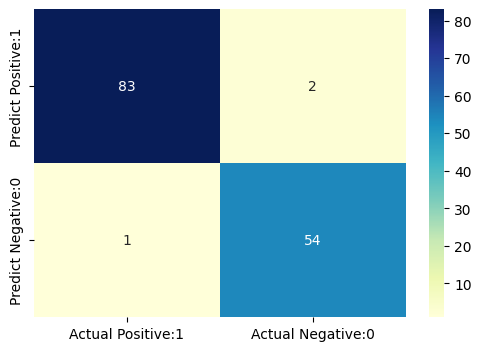

In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [ ]:
# Extracting TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm_7.ravel()

# Calculate classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

NameError: name 'FP' is not defined